In [20]:
import pandas as pd
from bairrosgeo import bairros
ba = bairros()
ba.head()

,bairro,descricao,geometry
0,AEROPORTO DE ARAGUAINA,,"POLYGON Z ((-48.25159 -7.22981 0.00000, -48.25..."
1,AEROVIARIO,,"POLYGON Z ((-48.23426 -7.19760 0.00000, -48.23..."
2,ALTO BONITO,,"POLYGON Z ((-48.18655 -7.21249 0.00000, -48.18..."
3,ARAGUAINA SUL,,"POLYGON Z ((-48.19617 -7.18907 0.00000, -48.19..."
4,BELCHIOR,,"POLYGON Z ((-48.20170 -7.15505 0.00000, -48.20..."


In [21]:
lanc = pd.read_csv('../dados/fazenda/dados_sefaz_lancamentos.csv',sep=";")
lanc["vencimento"] = pd.to_datetime(lanc['vencimento'])
lanc['ano'] = pd.DatetimeIndex(lanc['vencimento']).year
lanc.head()

,id,bairro,vencimento,exercicio,tipo,pago,valor,ano
0,29164,SENADOR,2015-01-01,2015,IPTU,NAO,1286,2015
1,34512,SETOR ANHANGUERA,2015-01-01,2015,IPTU,SIM,206,2015
2,71687,SAO JOAO,2015-01-01,2015,IPTU,NAO,1668,2015
3,42154,ARAGUAINA SUL,2015-01-01,2015,IPTU,NAO,900,2015
4,5403,SAO JOAO,2015-01-01,2015,TAXAS,SIM,878,2015


In [32]:
total_pago = lanc.loc[(lanc['ano']==2020) & (lanc['pago']=='SIM')].drop(columns=['id','vencimento','exercicio','tipo','pago','ano']).groupby('bairro').sum().reset_index()

total_pendente = lanc.loc[(lanc['ano']==2020) & (lanc['pago']=='NAO')].drop(columns=['id','vencimento','exercicio','tipo','pago','ano']).groupby('bairro').sum().reset_index()


In [33]:
#Merge os dados
df_mapa_pago = ba.merge(total_pago,how='left',left_on='bairro',right_on='bairro').drop(columns=['descricao'])
df_mapa_pendente = ba.merge(total_pendente,how='left',left_on='bairro',right_on='bairro').drop(columns=['descricao'])

<AxesSubplot:>

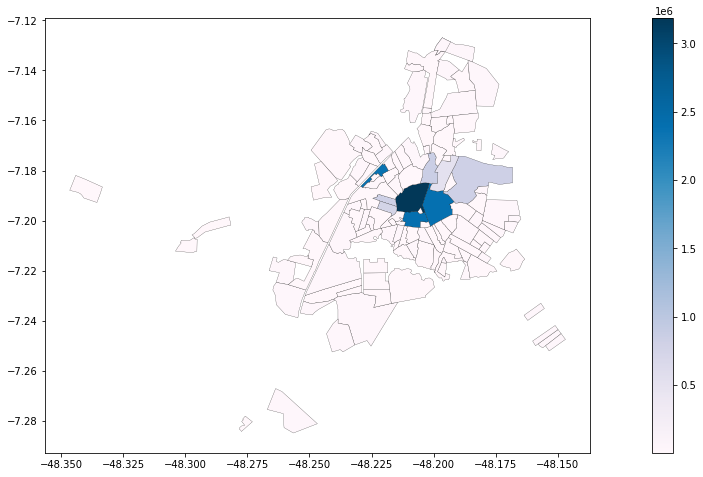

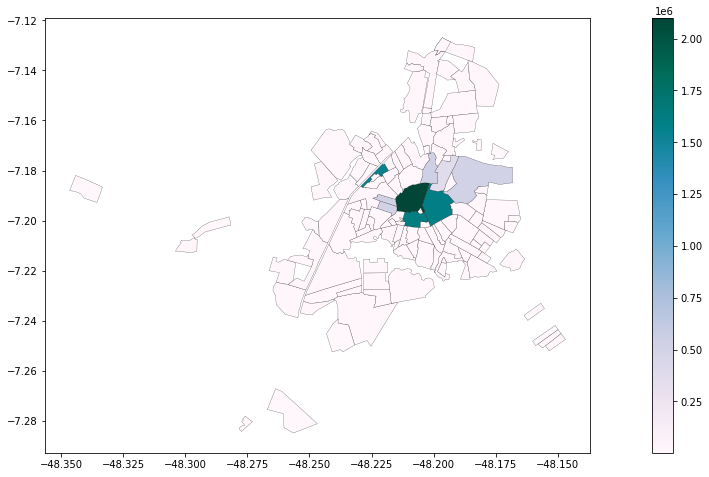

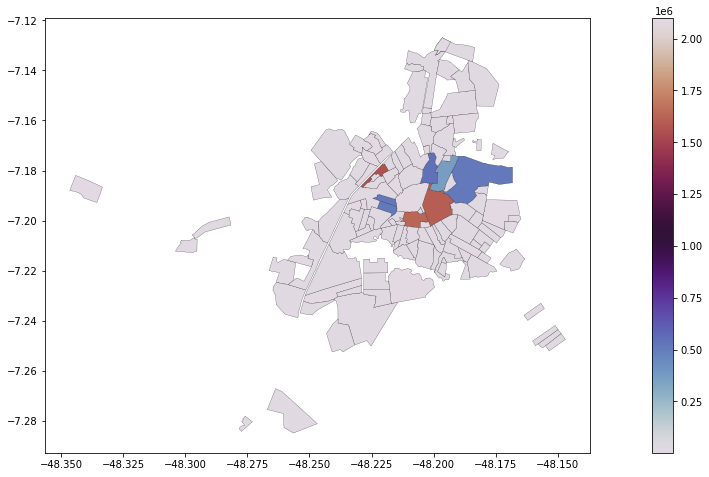

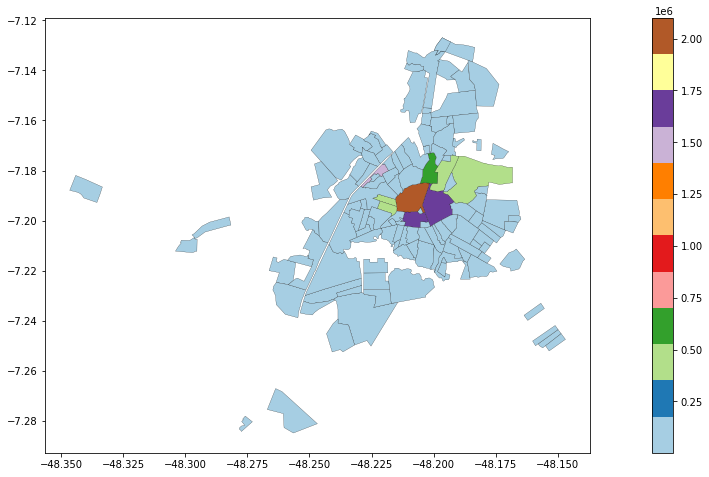

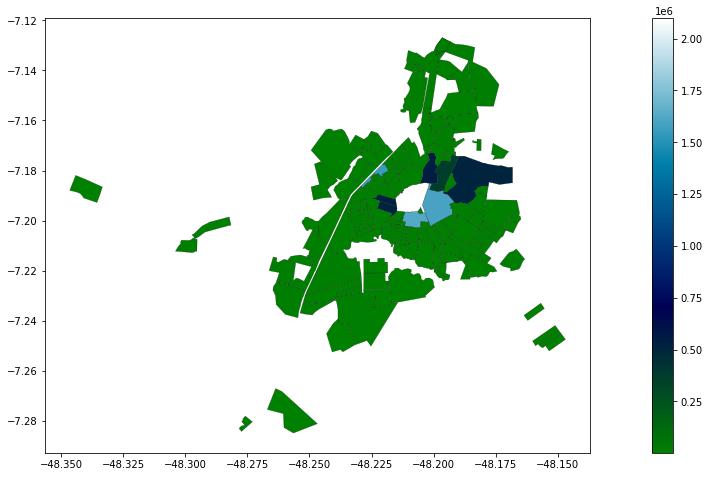

In [48]:
df_mapa_pago.plot(column='valor',legend=True,figsize=(22,8),cmap='PuBu',edgecolor='black',linewidth=0.2)
df_mapa_pendente.plot(column='valor',legend=True,figsize=(22,8),cmap='PuBuGn',edgecolor='black',linewidth=0.2)
df_mapa_pendente.plot(column='valor',legend=True,figsize=(22,8),cmap='twilight',edgecolor='black',linewidth=0.2)
df_mapa_pendente.plot(column='valor',legend=True,figsize=(22,8),cmap='Paired',edgecolor='black',linewidth=0.2)
df_mapa_pendente.plot(column='valor',legend=True,figsize=(22,8),cmap='ocean',edgecolor='black',linewidth=0.2)